In [7]:
import mujoco
import os
import jax
from jax import numpy as jnp
import numpy as np
# from flax.training import orbax_utils
# from flax import struct
from matplotlib import pyplot as plt
# import mediapy as media
# from orbax import checkpoint as ocp

import mujoco
import mediapy as media

In [3]:
xml = """
<mujoco>
  <worldbody>
    <light name="top" pos="0 0 1"/>
    <geom name="red_box" type="box" size=".2 .2 .2" rgba="1 0 0 1"/>
    <geom name="green_sphere" pos=".2 .2 .2" size=".1" rgba="0 1 0 1"/>
  </worldbody>
</mujoco>
"""
model = mujoco.MjModel.from_xml_string(xml)
data = mujoco.MjData(model)

In [4]:
## interesting functions

# model.geom('green_sphere').rgba
id = mujoco.mj_name2id(model, mujoco.mjtObj.mjOBJ_GEOM, 'green_sphere')
# model.geom_rgba
model.body('world') ## is the same as model.body(0)

<_MjModelBodyViews
  dofadr: array([-1], dtype=int32)
  dofnum: array([0], dtype=int32)
  geomadr: array([0], dtype=int32)
  geomnum: array([2], dtype=int32)
  id: 0
  inertia: array([0., 0., 0.])
  invweight0: array([0., 0.])
  ipos: array([0., 0., 0.])
  iquat: array([1., 0., 0., 0.])
  jntadr: array([-1], dtype=int32)
  jntnum: array([0], dtype=int32)
  mass: array([0.])
  mocapid: array([-1], dtype=int32)
  name: 'world'
  parentid: array([0], dtype=int32)
  pos: array([0., 0., 0.])
  quat: array([1., 0., 0., 0.])
  rootid: array([0], dtype=int32)
  sameframe: array([1], dtype=uint8)
  simple: array([1], dtype=uint8)
  subtreemass: array([0.])
  user: array([], dtype=float64)
  weldid: array([0], dtype=int32)
>

In [40]:
# print positions of data

print('raw access:\n', data.geom_xpos)
# you can also access indivial parts by name
print('\nnamed access\n', data.geom('green_sphere').xpos)

mujoco.mj_kinematics(model, data) # mjData properties are 'propagated'
print('\nnamed access\n', data.geom('green_sphere').xpos)


raw access:
 [[0. 0. 0.]
 [0. 0. 0.]]

named access
 [0. 0. 0.]

named access
 [0.2 0.2 0.2]


""

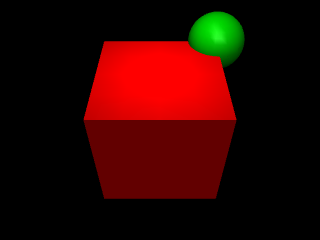

In [66]:
# now render the whole show
with mujoco.Renderer(model) as renderer:
  mujoco.mj_forward(model, data)
  renderer.update_scene(data)

  media.show_image(renderer.render())

""

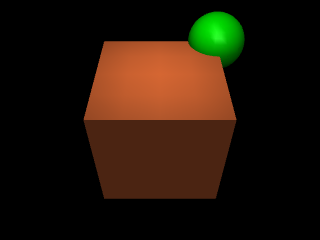

In [ ]:
model.geom('red_box').rgba[:3] = np.random.rand(3)
with mujoco.Renderer(model) as renderer:
  renderer.update_scene(data)
  media.show_image(renderer.render())

### Video of new mujoco object

In [10]:
xml = """
<mujoco>
  <worldbody>
    <light name="top" pos="0 0 1"/>
    <body name="box_and_sphere" euler="0 0 -30">
      <joint name="swing" type="hinge" axis="1 -1 0" pos="-.2 -.2 -.2"/>
      <geom name="red_box" type="box" size=".2 .2 .2" rgba="1 0 0 1"/>
      <geom name="green_sphere" pos=".2 .2 .2" size=".1" rgba="0 1 0 1"/>
    </body>
  </worldbody>
</mujoco>
"""
model = mujoco.MjModel.from_xml_string(xml)
data = mujoco.MjData(model)

# enable joint visualization option:
scene_option = mujoco.MjvOption()
scene_option.flags[mujoco.mjtVisFlag.mjVIS_JOINT] = True

In [11]:
duration = 3.8  # (seconds)
framerate = 60  # (Hz)

# Simulate and display video.
frames = []
mujoco.mj_resetData(model, data)  # Reset state and time.
with mujoco.Renderer(model) as renderer:
  while data.time < duration:
    mujoco.mj_step(model, data)
    if len(frames) < data.time * framerate:
      renderer.update_scene(data)
      pixels = renderer.render()
      frames.append(pixels)

media.show_video(frames, fps=framerate)